# AI Based Evaluate the competency of the Institution:

**1. Data Preparation:**

   - Gather Data: Ensure you have a comprehensive dataset that includes information about educational institutions, including features like program details, license status, program modalities, geographical location, survival period, website availability, and other relevant data.

   - Define the Target Variable: In this case, your target variable would be "competency level" or a similar metric that represents how competent an institution is. This can be a continuous variable or a categorical variable representing different competency levels.

   - Data Preprocessing: Clean and preprocess the data, including handling missing values, encoding categorical variables, and normalizing/standardizing numerical features.

**2. Model Building:**

   - Model Selection: Choose an appropriate machine learning or AI model for regression (if competency is continuous) or for multi-class classification (if competency is categorical). Common choices include linear regression, decision trees, random forests, support vector machines, or neural networks.

   - Feature Selection: Identify the most relevant features for predicting competency. You can use techniques like feature importance analysis to prioritize features.

   - Model Training: Split the dataset into training and testing sets, then train your model on the training data.


   - Confidence Score: Provide a confidence score or prediction interval along with the prediction to indicate the uncertainty of the competency prediction.

**4. User Interface:**

   - Develop a user-friendly interface where users can input information about an institution (e.g., program details, license status, etc.).

   - Display the competency level prediction and confidence score.

**5. Continuous Improvement:**

   - Monitor Model Performance: Continuously monitor the model's performance and retrain it periodically to keep it up to date with the latest data.

   - Feedback Loop: Incorporate a feedback mechanism where users can provide feedback on the competency predictions, which can be used for model improvement.

**6. Deployment and Integration:**

   - Deploy the AI-based system in a production environment where ETA or relevant stakeholders can access and use it.

   - Ensure integration with existing systems and databases for seamless data flow.

**7. Documentation and Training:**

   - Document the system's usage, model details, and maintenance procedures.

   - Provide training to relevant users on how to use the AI-based competency evaluation system effectively.

**8. Testing and Validation:**

   - Thoroughly test the system with different institutions and scenarios to ensure its accuracy and reliability.

**9. Compliance and Security:**

   - Ensure that the system complies with relevant data protection and security regulations, especially when handling sensitive institutional data.

**10. Communication:**

   - Clearly communicate the system's capabilities and limitations to users and stakeholders.

By following this modified roadmap, you can build an AI-based competency evaluation system that predicts institutional competency based on license status and other relevant features. This system can assist ETA in assessing institutional competency efficiently.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
import os

In [60]:
data = pd.read_csv("ETA_Data.csv")
data.tail()

,Serial_No,Institution_name,Field_of_study,Education_Level,Academic_Discipline,Program,Date_Of_License,End_Of_License_Date,Survival_Period,License_Status,Campus_Location,Region,Addmission_Of_New_Entry,Intake_Capacity,Institute_website
4116,349,Green land College,Business Administration,MA Degree,Social Science,Regular,05-01-23,05-01-26,3,Active,Jimma,Oromia,Allowed,45.0,No
4117,350,Hidase Medical Science and Business College,Management,BA Degree,Social Science,Regular,04-01-23,03-01-27,4,Active,Gilgel Beles,Benishangul-Gumuz,Allowed,45.0,No
4118,350,Hidase Medical Science and Business College,Nursing,BSc Degree,Natural Science,Regular,04-01-23,03-01-27,4,Active,Gilgel Beles,Benishangul-Gumuz,Allowed,40.0,No
4119,351,Hiwet AmbaCollege,Nursing,BSc Degree,Natural Science,Regular,07-01-23,03-01-27,4,Active,Addis Zemen,Amhara,Allowed,40.0,No
4120,351,Hiwet AmbaCollege,Management,BA Degree,Social Science,Regular,07-01-23,03-01-27,4,Active,Addis Zemen,Amhara,Allowed,NaN,NaN


# 1. Feature engineering :
involves creating new features from existing data to improve the performance of machine learning models.to perform feature engineering based on the provided data to evaluate the competency of institutions, considering their field of study and other relevant factors. Here's a step-by-step guide with source code in Python:

### The provided code appears to be performing the following tasks:

1. **Loading a Dataset:** It assumes that you have a dataset named "ETA_Data.csv" and uses the pandas library to load this dataset into a DataFrame.

2. **Define an Evaluation Function:** The code defines a function named `evaluate_competency` that takes a row of data as input and calculates the competency level based on certain conditions. The conditions for determining competency are as follows:
   - If the 'License_Status' is 'Active,' it considers the 'Survival_Period' of programs in the field of study.
   - Depending on the 'Survival_Period,' it assigns a competency level, such as 'Excellent,' 'Very Good,' 'Good,' etc., to each program.

3. **Apply the Evaluation Function:** The `apply` method is used to apply the `evaluate_competency` function to each row of the DataFrame, creating a new column called 'Competency' that stores the competency level for each program.

4. **Define a Competency Mapping:** The code defines a dictionary (`competency_mapping`) that maps competency levels (e.g., 'Excellent') to numeric competency ratings (e.g., 5.0).

5. **Map Competency Levels to Ratings:** Another column called 'Competency_Rating' is created by mapping the competency levels from the 'Competency' column to their corresponding numeric ratings using the defined mapping.

6. **Save the Updated Dataset:** Finally, the updated DataFrame, which now includes the 'Competency' and 'Competency_Rating' columns, is saved as a new CSV file named "ETA_Data_With_Competency.csv."

In summary, this code calculates and assigns competency levels and ratings to programs based on their 'License_Status' and 'Survival_Period' and saves the updated dataset with these additional features. The competency levels are determined using specific criteria, and these levels are mapped to numeric ratings for further analysis.

In [52]:
import pandas as pd
import numpy as np  # Import NumPy

# Load the data from the CSV file into a DataFrame
data = pd.read_csv("ETA_Data_With_Competency.csv")

# Get the data types of all columns
data_types = data.dtypes

# Separate categorical and numerical columns
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()

print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Institution_name', 'Field_of_study', 'Education_Level',
       'Academic_Discipline', 'Program', 'Date_Of_License',
       'End_Of_License_Date', 'License_Status', 'Campus_Location', 'Region',
       'Addmission_Of_New_Entry', 'Institute_website', 'Competency'],
      dtype='object')
Numerical Variables:
['Serial_No', 'Survival_Period', 'Intake_Capacity', 'Competency_Rating']


### Imputation of Missing Values:

In [53]:
import pandas as pd

# Load the dataset
data = pd.read_csv("ETA_Data.csv")

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Impute missing values in 'Intake_Capacity' with the mean
mean_intake_capacity = data['Intake_Capacity'].mean()
data['Intake_Capacity'].fillna(mean_intake_capacity, inplace=True)

Missing Values:
Serial_No                     0
Institution_name              0
Field_of_study                0
Education_Level               0
Academic_Discipline           0
Program                       0
Date_Of_License               1
End_Of_License_Date          14
Survival_Period               0
License_Status                0
Campus_Location               0
Region                        0
Addmission_Of_New_Entry       1
Intake_Capacity            3985
Institute_website            15
dtype: int64


### Competency Evaluation Function (evaluate_competency):

In [54]:
import pandas as pd

# Load your dataset here (assuming you've already loaded it)
data = pd.read_csv("ETA_Data.csv")

# Define a function to evaluate competency
def evaluate_competency(row):
    # Check if the license status is 'Active' 
    if row['License_Status'] == 'Active':
        # Calculate the Survival_Period of programs in the field of study
        Survival_Period = data[data['Survival_Period'] == row['Survival_Period']]['Survival_Period'].count()

        # Determine competency based on field density
        if row['Survival_Period'] >= 20:
            return 'Excellent'
        elif row['Survival_Period'] >= 15:
            return 'Very Good'
        elif row['Survival_Period'] >= 10:
            return 'Good'
        elif row['Survival_Period'] >= 5:
            return 'Average'
        elif row['Survival_Period'] >= 4:
            return 'Below Average'
        elif row['Survival_Period'] >= 3:
            return 'Poor'
        elif row['Survival_Period'] >= 2:
            return 'Very Poor'
        elif row['Survival_Period'] >= 1:
            return 'Extremely Poor'
        else:
            return 'Very Very Low'
    else:
        return 'Very Very Low'  # If not active or survival period is less than 3 years

# Apply the function to create the 'Competency' feature
data['Competency'] = data.apply(evaluate_competency, axis=1)

# Define a mapping for competency levels
competency_mapping = {
    'Excellent': 5.0,
    'Very Good': 4.5,
    'Good': 4.0,
    'Average': 3.5,
    'Below Average': 3.0,
    'Poor': 2.5,
    'Very Poor': 2.0,
    'Extremely Poor': 1.5,
    'Very Very Low': 1.0
}

# Map competency levels to competency rating
data['Competency_Rating'] = data['Competency'].map(competency_mapping)

# Save the updated dataset with the new feature
data.to_csv("ETA_Data_With_Competency.csv", index=False)


In [55]:
import pandas as pd

# Load the dataset with competency data
data = pd.read_csv("ETA_Data_With_Competency.csv")

# Select specific columns
selected_columns = ["Institution_name", "Field_of_study", "Competency", "Competency_Rating"]

# Extract the selected columns
selected_data = data[selected_columns]

# Print the last few rows of the selected data
print(selected_data.tail(5))

                                 Institution_name           Field_of_study  \
4116                           Green land College  Business Administration   
4117  Hidase Medical Science and Business College               Management   
4118  Hidase Medical Science and Business College                  Nursing   
4119                            Hiwet AmbaCollege                  Nursing   
4120                            Hiwet AmbaCollege               Management   

         Competency  Competency_Rating  
4116           Poor                2.5  
4117  Below Average                3.0  
4118  Below Average                3.0  
4119  Below Average                3.0  
4120  Below Average                3.0  


In [156]:
import pandas as pd

# Read the original CSV file
data = pd.read_csv("ETA_Data_With_Competency.csv")

# Extract the desired columns
selected_columns = ["Institution_name", "Field_of_study", "Education_Level", "Competency", "Competency_Rating"]
selected_data = data[selected_columns]

# Save the extracted data to a new CSV file
selected_data.to_csv("selected_data.csv", index=False)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4121 entries, 0 to 4120
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Institution_name   4121 non-null   object 
 1   Field_of_study     4121 non-null   object 
 2   Education_Level    4121 non-null   object 
 3   Competency         4121 non-null   object 
 4   Competency_Rating  4121 non-null   float64
dtypes: float64(1), object(4)
memory usage: 161.1+ KB


### Ordinal and nominal categorical features are two types of categorical data in statistics and machine learning, and they are treated differently in terms of data encoding:

1. **Ordinal Categorical Features**:
   - Ordinal categorical features represent categories with a clear and meaningful order or ranking.
   - The categories have a natural sequence, and one category can be considered "greater" or "higher" than another.
   - Examples of ordinal categorical features include education levels (e.g., "High School," "Bachelor's Degree," "Master's Degree"), customer satisfaction ratings (e.g., "Very Dissatisfied," "Dissatisfied," "Neutral," "Satisfied," "Very Satisfied"), or star ratings (e.g., 1-star, 2-star, 3-star, 4-star, 5-star).
   - Ordinal features can be encoded using label encoding, where each category is assigned an integer value based on its order. The integer values maintain the ordinal relationship.

2. **Nominal Categorical Features**:
   - Nominal categorical features represent categories with no inherent order or ranking.
   - The categories are distinct and unrelated, and there is no natural sequence among them.
   - Examples of nominal categorical features include colors (e.g., "Red," "Green," "Blue"), countries (e.g., "USA," "Canada," "France"), or product types (e.g., "Electronics," "Clothing," "Furniture").
   - Nominal features are typically encoded using one-hot encoding, where each category is converted into a binary vector with one "hot" (1) value indicating the presence of the category and zeros (0) for all other categories.

In machine learning, the choice between label encoding (for ordinal features) and one-hot encoding (for nominal features) is important because it can impact the performance of the model. Using the wrong encoding method can introduce unintended relationships or distort the data.

It's crucial to correctly identify whether a categorical feature is ordinal or nominal and choose the encoding method accordingly to ensure that the model interprets the data correctly and makes meaningful predictions.

In [158]:
import pandas as pd

# Load your dataset
data = pd.read_csv("selected_data.csv")  # Replace with your actual dataset path

# Define a function to identify ordinal columns based on unique values
def identify_ordinal_columns(df):
    ordinal_columns = []
    for column in df.columns:
        unique_values = df[column].unique()
        # You can add your own criteria to identify ordinal columns
        if len(unique_values) <= 10:
            ordinal_columns.append(column)
    return ordinal_columns

# Define a function to identify nominal columns based on unique values
def identify_nominal_columns(df):
    nominal_columns = []
    for column in df.columns:
        unique_values = df[column].unique()
        # You can add your own criteria to identify nominal columns
        if len(unique_values) > 10:
            nominal_columns.append(column)
    return nominal_columns

# Identify and print ordinal columns
ordinal_cols = identify_ordinal_columns(data)
print("Ordinal Categorical Columns:")
print(ordinal_cols)

# Identify and print nominal columns
nominal_cols = identify_nominal_columns(data)
print("\nNominal Categorical Columns:")
print(nominal_cols)


Ordinal Categorical Columns:
['Education_Level', 'Competency', 'Competency_Rating']

Nominal Categorical Columns:
['Institution_name', 'Field_of_study']


### To create a distribution curve for the "Competency" data using a histogram

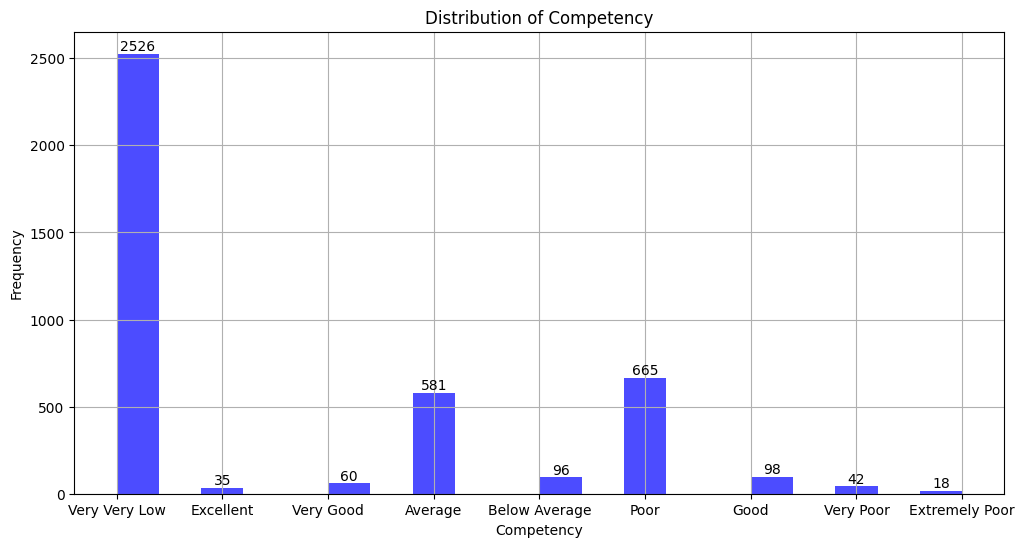

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset (replace 'selected_data.csv' with your actual dataset file)
data = pd.read_csv('selected_data.csv')

# Extract the "Competency" column from the dataset
competency_data = data['Competency']

# Create a histogram to visualize the distribution
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(competency_data, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Competency')
plt.xlabel('Competency')
plt.ylabel('Frequency')
plt.grid(True)

# Add values on top of the bars without '0's
for patch in patches:
    x = patch.get_x() + patch.get_width() / 2  # Calculate the x-coordinate for the text
    y = patch.get_height()  # Get the height of the bar
    if y != 0:
        plt.text(x, y, f'{int(y)}', ha='center', va='bottom', fontsize=10, color='black')

plt.show()



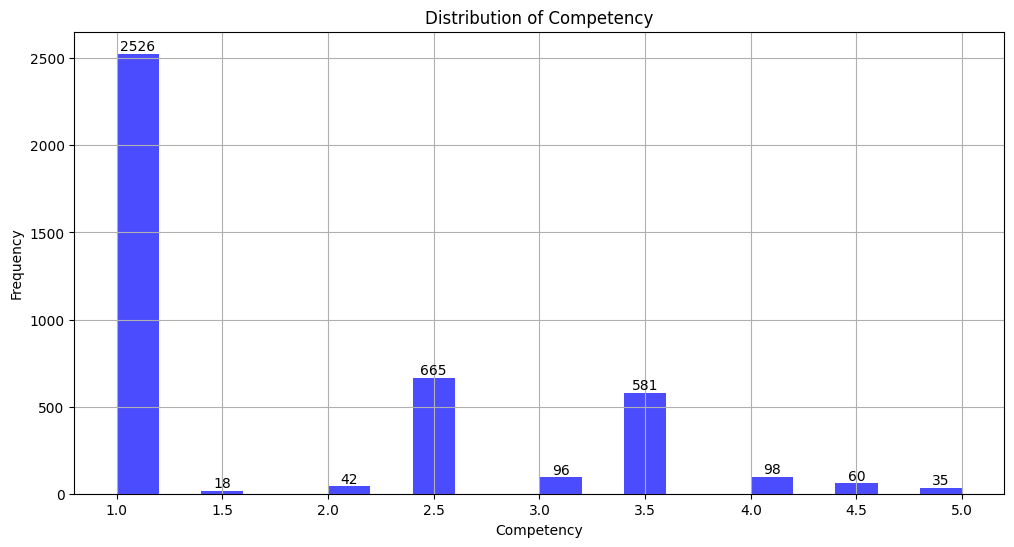

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset (replace 'selected_data.csv' with your actual dataset file)
data = pd.read_csv('selected_data.csv')

# Extract the "Competency" column from the dataset
competency_data = data['Competency_Rating']

# Create a histogram to visualize the distribution
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(competency_data, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Competency')
plt.xlabel('Competency')
plt.ylabel('Frequency')
plt.grid(True)

# Add values on top of the bars without '0's
for patch in patches:
    x = patch.get_x() + patch.get_width() / 2  # Calculate the x-coordinate for the text
    y = patch.get_height()  # Get the height of the bar
    if y != 0:
        plt.text(x, y, f'{int(y)}', ha='center', va='bottom', fontsize=10, color='black')

plt.show()

## 2. This code includes label encoding, handling missing values, removing outliers,
and saving the preprocessed data to a CSV file. Make sure to adapt it to your specific dataset and preprocessing requirements:

In [65]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the preprocessed data
data = pd.read_csv("selected_data.csv")

# Identify categorical columns (excluding Competency_Rating)
categorical_columns = ['Institution_name', 'Field_of_study', 'Education_Level', 'Competency']

# Apply label encoding to categorical columns
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Extract features and target variables
X = data[['Institution_name', 'Field_of_study', 'Education_Level']]
y_competency = data['Competency']
y_competency_rating = data['Competency_Rating']

# Create a copy of X to avoid the SettingWithCopyWarning
X_copy = X.copy()

# Handle missing values (replace NaN with median) on the copied DataFrame
X_copy.fillna(X_copy.median(), inplace=True)

# Save the preprocessed data as a single CSV file
preprocessed_data = pd.concat([X_copy, y_competency, y_competency_rating], axis=1)
preprocessed_data.to_csv('preprocessed_data.csv', index=False)


In [66]:
import pandas as pd

# Read the CSV file
selected_data = pd.read_csv("preprocessed_data.csv")

# Display the top few rows (by default, the first 5 rows)
print("preprocessed_data.csv:")
print(selected_data.head())

preprocessed_data.csv:
   Institution_name  Field_of_study  Education_Level  Competency  \
0                16             160                1           8   
1                16               0                0           8   
2                16               7                0           8   
3                16             198                0           8   
4                16             191                0           2   

   Competency_Rating  
0                1.0  
1                1.0  
2                1.0  
3                1.0  
4                5.0  


### Imputation of Missing Values:

In [67]:
import pandas as pd

# Load the dataset
data = pd.read_csv("preprocessed_data.csv")

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Institution_name     0
Field_of_study       0
Education_Level      0
Competency           0
Competency_Rating    0
dtype: int64


# 2. Model Selection: 
Choose an appropriate machine learning or AI model for multi-class classification (if competency is categorical). Common choices include linear regression, decision trees, random forests, support vector machines, or neural networks.

### 1. A Decision Tree Classifier
The code essentially builds and evaluates machine learning models for predicting competency and competency ratings based on the provided dataset, and then it saves these models for future predictions.Creates and trains a Decision Tree Classifier model for predicting "Competency." and "Competency Rating."

In [78]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import joblib

# Load your dataset here (assuming you've already loaded it)
data = pd.read_csv("preprocessed_data.csv")

# Identify outliers (assuming 'outliers' is a DataFrame containing outliers)
# You can define 'outliers' using a method like the IQR method.
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

# Handle missing values (replace NaN with median)
data.fillna(data.median(), inplace=True)

# Remove outliers
data = data[~outliers]

# Define features and target variables
X = data[['Institution_name', 'Field_of_study', 'Education_Level']]
y_competency = data['Competency']
y_competency_rating = data['Competency_Rating']

# Split the data into training and testing sets
X_train, X_test, y_train_competency, y_test_competency, y_train_competency_rating, y_test_competency_rating = train_test_split(
    X, y_competency, y_competency_rating, test_size=0.2, random_state=42
)

# Create and train the Decision Tree Classifier for Competency
clf_competency = DecisionTreeClassifier(random_state=42)
clf_competency.fit(X_train, y_train_competency)

# Create and train the Decision Tree Regressor for Competency Rating
regressor_competency_rating = DecisionTreeRegressor(random_state=42)
regressor_competency_rating.fit(X_train, y_train_competency_rating)

# Evaluate the models (you can use different evaluation metrics)
accuracy_competency = clf_competency.score(X_test, y_test_competency)
r2_score_competency_rating = regressor_competency_rating.score(X_test, y_test_competency_rating)

print(f"Accuracy for Competency: {accuracy_competency}")
print(f"R2 Score for Competency Rating: {r2_score_competency_rating}")

# Save the trained models to files
joblib.dump(clf_competency, 'decision_tree_model_competency.pkl')
joblib.dump(regressor_competency_rating, 'decision_tree_model_competency_rating.pkl')


Accuracy for Competency: 0.7043478260869566
R2 Score for Competency Rating: -0.28813183171275725


['decision_tree_model_competency_rating.pkl']

### To perform hyperparameter tuning for the Decision Tree Classifier
and Decision Tree Regressor models for "Competency" and "Competency Rating," you can use techniques like Grid Search or Random Search. Here's an example using Grid Search:

In [73]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import joblib

# Load your dataset here (assuming you've already loaded it)
data = pd.read_csv("preprocessed_data.csv")

# Define features and target variables
X = data[['Institution_name', 'Field_of_study', 'Education_Level']]
y_competency = data['Competency']
y_competency_rating = data['Competency_Rating']

# Split the data into training and testing sets
X_train, X_test, y_train_competency, y_test_competency, y_train_competency_rating, y_test_competency_rating = train_test_split(
    X, y_competency, y_competency_rating, test_size=0.2, random_state=42
)

# Create a Decision Tree Classifier for Competency
clf_competency = DecisionTreeClassifier(random_state=42)

# Define hyperparameters and their possible values for tuning
param_grid_competency = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a grid search for hyperparameter tuning
grid_search_competency = GridSearchCV(clf_competency, param_grid=param_grid_competency, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_competency.fit(X_train, y_train_competency)

# Get the best hyperparameters
best_params_competency = grid_search_competency.best_params_

# Create a Decision Tree Regressor for Competency Rating
regressor_competency_rating = DecisionTreeRegressor(random_state=42)

# Define hyperparameters and their possible values for tuning
param_grid_competency_rating = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a grid search for hyperparameter tuning
grid_search_competency_rating = GridSearchCV(regressor_competency_rating, param_grid=param_grid_competency_rating, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_competency_rating.fit(X_train, y_train_competency_rating)

# Get the best hyperparameters
best_params_competency_rating = grid_search_competency_rating.best_params_

# Print the best hyperparameters
print("Best Hyperparameters for Competency Classifier:", best_params_competency)
print("Best Hyperparameters for Competency Rating Regressor:", best_params_competency_rating)

# Save the trained models with the best hyperparameters to files
joblib.dump(grid_search_competency.best_estimator_, 'tune_decision_tree_model_competency.pkl')
joblib.dump(grid_search_competency_rating.best_estimator_, 'tune_decision_tree_model_competency_rating.pkl')


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters for Competency Classifier: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Hyperparameters for Competency Rating Regressor: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


['tune_decision_tree_model_competency_rating.pkl']

### An accuracy score of 0.577 for Competency indicates that the model is able to correctly predict the competency level of an ETA with 57.7% accuracy. This is a moderate accuracy, but it could be improved.

An R-squared score of -0.147 for Competency Rating indicates that the model is not able to explain the variation in Competency Rating very well. This is a negative R-squared score, which is possible when the model is worse than a baseline model that simply predicts the mean of the target variable.

Overall, these results suggest that the model is not very good at predicting the competency level of an ETA. There are a few possible explanations for this:

* The model may be overfitting the training data. This means that the model is learning to fit the noise in the training data too closely, and is not able to generalize to new data.
* The model may be too simple. It may not be able to capture the complex relationships between the predictor variables and the target variable.
* The data may be too noisy. This means that there is a lot of variation in the data that is not explained by the predictor variables.

To improve the performance of the model, you could try the following:

* Use a more complex model. This could involve using a different machine learning algorithm, or adding more features to the model.
* Use regularization techniques to prevent the model from overfitting.
* Use data cleaning techniques to remove noise from the data.

You could also try to collect more data, especially data from a wider range of ETAs. This would help the model to learn the patterns in the data more accurately and to generalize to new data better.

It is important to note that the accuracy and R-squared scores are just two metrics that can be used to evaluate the performance of a machine learning model. There are other metrics that may be more relevant for your specific problem. For example, you may be more interested in the precision or recall of the model.

It is also important to consider the context in which the model will be used. For example, if the model is being used to make high-stakes decisions, such as whether or not to hire an ETA, then you would want to use a model with a very high accuracy. However, if the model is being used to make lower-stakes decisions, such as recommending training courses for ETAs, then you may be able to tolerate a lower accuracy.

### Certainly! Here are some improvements you can make to enhance the performance of your machine learning model along with source code examples:

1. **Use a Different Machine Learning Algorithm:**

   You can try using different machine learning algorithms to see if they perform better on your dataset. For example, you can replace the Decision Tree Classifier and Regressor with Random Forest and Gradient Boosting algorithms.

   ```python
   from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor

   # Create and train a Random Forest Classifier for Competency
   clf_competency = RandomForestClassifier(random_state=42)
   clf_competency.fit(X_train, y_train_competency)

   # Create and train a Gradient Boosting Regressor for Competency Rating
   regressor_competency_rating = GradientBoostingRegressor(random_state=42)
   regressor_competency_rating.fit(X_train, y_train_competency_rating)
   ```

2. **Regularization Techniques:**

   Regularization techniques like adjusting hyperparameters can help prevent overfitting. For Decision Trees, you can experiment with hyperparameters like `max_depth`, `min_samples_split`, and `min_samples_leaf`. Here's how you can do it:

   ```python
   # Create and train the Decision Tree Classifier for Competency with regularization
   clf_competency = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=2, random_state=42)
   clf_competency.fit(X_train, y_train_competency)

   # Create and train the Decision Tree Regressor for Competency Rating with regularization
   regressor_competency_rating = DecisionTreeRegressor(max_depth=5, min_samples_split=5, min_samples_leaf=2, random_state=42)
   regressor_competency_rating.fit(X_train, y_train_competency_rating)
   ```

3. **Data Cleaning:**

   Data cleaning techniques involve handling missing values and outliers in your dataset. You can use techniques like imputation for missing values and removing or transforming outliers.

   ```python
   # Handle missing values (replace NaN with median)
   X_train.fillna(X_train.median(), inplace=True)
   X_test.fillna(X_train.median(), inplace=True)

   # Remove outliers (assuming 'outliers' is a DataFrame containing outliers)
   X_train = X_train[~X_train.index.isin(outliers.index)]
   y_train_competency = y_train_competency[~y_train_competency.index.isin(outliers.index)]
   y_train_competency_rating = y_train_competency_rating[~y_train_competency_rating.index.isin(outliers.index)]
   ```

Remember that these improvements should be done incrementally, and you should evaluate the model's performance after each change to ensure it's getting better. Additionally, you can consider techniques like feature engineering and hyperparameter tuning to further enhance your model's performance.

### 2. Use a Different Machine Learning Algorithm:

You can try using different machine learning algorithms to see if they perform better on your dataset. For example, you can replace the Decision Tree Classifier and Regressor with Random Forest and Gradient Boosting algorithms.

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, r2_score

# Load your dataset here (assuming you've already loaded it)
data = pd.read_csv("preprocessed_data.csv")

# Identify outliers (assuming 'outliers' is a DataFrame containing outliers)
# You can define 'outliers' using a method like the IQR method.
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

# Handle missing values (replace NaN with median)
data.fillna(data.median(), inplace=True)

# Remove outliers
data = data[~outliers]

# Define features and target variables
X = data[['Institution_name', 'Field_of_study', 'Education_Level']]
y_competency = data['Competency']
y_competency_rating = data['Competency_Rating']

# Split the data into training and testing sets for Competency
X_train, X_test, y_train_competency, y_test_competency = train_test_split(X, y_competency, test_size=0.2, random_state=42)

# Split the data into training and testing sets for Competency Rating
X_train_rating, X_test_rating, y_train_competency_rating, y_test_competency_rating = train_test_split(
    X, y_competency_rating, test_size=0.2, random_state=42
)

# Initialize and train different classifiers for Competency
classifiers_competency = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel="linear", random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

# Initialize and train a DecisionTreeRegressor for Competency Rating
regressor_competency_rating = DecisionTreeRegressor(random_state=42)
regressor_competency_rating.fit(X_train_rating, y_train_competency_rating)

# Evaluate Competency classifiers
results_competency = {}

for name, clf in classifiers_competency.items():
    clf.fit(X_train, y_train_competency)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test_competency, y_pred)
    results_competency[name] = accuracy

# Evaluate Competency Rating regressor
y_pred_rating = regressor_competency_rating.predict(X_test_rating)
r2_score_competency_rating = r2_score(y_test_competency_rating, y_pred_rating)

# Print the accuracy results for Competency classifiers
for name, accuracy in results_competency.items():
    print(f"{name} Competency Accuracy: {accuracy}")

# Print the R-squared score for Competency Rating regressor
print(f"R-squared for Competency Rating: {r2_score_competency_rating}")


Random Forest Competency Accuracy: 0.6826086956521739
Gradient Boosting Competency Accuracy: 0.7260869565217392
Support Vector Machine Competency Accuracy: 0.7086956521739131
Neural Network Competency Accuracy: 0.6420289855072464
R-squared for Competency Rating: -0.28813183171275725


### 3. Gradient Boosting models 

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, r2_score
import joblib

# Load your dataset here (assuming you've already loaded it)
data = pd.read_csv("preprocessed_data.csv")

# Identify outliers (assuming 'outliers' is a DataFrame containing outliers)
# You can define 'outliers' using a method like the IQR method.
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

# Handle missing values (replace NaN with median)
data.fillna(data.median(), inplace=True)

# Remove outliers
data = data[~outliers]

# Define features and target variables
X = data[['Institution_name', 'Field_of_study', 'Education_Level']]
y_competency = data['Competency']
y_competency_rating = data['Competency_Rating']

# Split the data into training and testing sets for Competency
X_train, X_test, y_train_competency, y_test_competency = train_test_split(X, y_competency, test_size=0.2, random_state=42)

# Split the data into training and testing sets for Competency Rating
X_train_rating, X_test_rating, y_train_competency_rating, y_test_competency_rating = train_test_split(
    X, y_competency_rating, test_size=0.2, random_state=42
)

# Initialize and train Gradient Boosting classifiers for Competency
clf_competency = GradientBoostingClassifier(n_estimators=100, random_state=42)
clf_competency.fit(X_train, y_train_competency)

# Initialize and train Gradient Boosting regressors for Competency Rating
regressor_competency_rating = GradientBoostingRegressor(n_estimators=100, random_state=42)
regressor_competency_rating.fit(X_train_rating, y_train_competency_rating)

# Evaluate Competency classifier
y_pred_competency = clf_competency.predict(X_test)
accuracy_competency = accuracy_score(y_test_competency, y_pred_competency)

# Evaluate Competency Rating regressor
y_pred_competency_rating = regressor_competency_rating.predict(X_test_rating)
r2_score_competency_rating = r2_score(y_test_competency_rating, y_pred_competency_rating)

# Print the accuracy results for Competency classifier
print(f"Gradient Boosting Competency Accuracy: {accuracy_competency}")

# Print the R-squared score for Competency Rating regressor
print(f"Gradient Boosting Competency Rating R-squared: {r2_score_competency_rating}")

# Save the trained models to files
joblib.dump(clf_competency, 'gradient_boosting_model_competency.pkl')
joblib.dump(regressor_competency_rating, 'gradient_boosting_model_competency_rating.pkl')



Gradient Boosting Competency Accuracy: 0.7260869565217392
Gradient Boosting Competency Rating R-squared: 0.10744559849121615


['gradient_boosting_model_competency_rating.pkl']

### GridSearchCV or RandomizedSearchCV to fine-tune the hyperparameters of your Gradient Boosting models

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, r2_score
import joblib

# Load your dataset here (assuming you've already loaded it)
data = pd.read_csv("preprocessed_data.csv")

# Identify outliers (assuming 'outliers' is a DataFrame containing outliers)
# You can define 'outliers' using a method like the IQR method.
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

# Handle missing values (replace NaN with median)
data.fillna(data.median(), inplace=True)

# Remove outliers
data = data[~outliers]

# Define features and target variables for Competency
X_competency = data[['Institution_name', 'Field_of_study', 'Education_Level']]
y_competency = data['Competency']

# Define features and target variables for Competency Rating
X_competency_rating = data[['Institution_name', 'Field_of_study', 'Education_Level']]
y_competency_rating = data['Competency_Rating']

# Split the data into training and testing sets for Competency
X_train_competency, X_test_competency, y_train_competency, y_test_competency = train_test_split(
    X_competency, y_competency, test_size=0.2, random_state=42
)

# Split the data into training and testing sets for Competency Rating
X_train_competency_rating, X_test_competency_rating, y_train_competency_rating, y_test_competency_rating = train_test_split(
    X_competency_rating, y_competency_rating, test_size=0.2, random_state=42
)

# Define hyperparameters and values to search
param_grid_competency = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}

param_grid_competency_rating = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}

# Initialize the Gradient Boosting classifier and regressor for Competency
clf_competency = GradientBoostingClassifier(random_state=42)
regressor_competency_rating = GradientBoostingRegressor(random_state=42)

# Perform GridSearchCV for hyperparameter tuning for Competency
grid_search_competency = GridSearchCV(estimator=clf_competency, param_grid=param_grid_competency, cv=5)
grid_search_competency.fit(X_train_competency, y_train_competency)

# Perform GridSearchCV for hyperparameter tuning for Competency Rating
grid_search_competency_rating = GridSearchCV(estimator=regressor_competency_rating, param_grid=param_grid_competency_rating, cv=5)
grid_search_competency_rating.fit(X_train_competency_rating, y_train_competency_rating)

# Get the best parameters and models for Competency and Competency Rating
best_params_competency = grid_search_competency.best_params_
best_model_competency = grid_search_competency.best_estimator_
best_params_competency_rating = grid_search_competency_rating.best_params_
best_model_competency_rating = grid_search_competency_rating.best_estimator_

# Make predictions on the test set for Competency
y_pred_competency = best_model_competency.predict(X_test_competency)

# Make predictions on the test set for Competency Rating
y_pred_competency_rating = best_model_competency_rating.predict(X_test_competency_rating)

# Calculate accuracy for Competency
accuracy_competency = accuracy_score(y_test_competency, y_pred_competency)
print(f"Accuracy for Competency: {accuracy_competency}")

# Calculate R2 score for Competency Rating
r2_score_competency_rating = r2_score(y_test_competency_rating, y_pred_competency_rating)
print(f"R2 Score for Competency Rating: {r2_score_competency_rating}")

# Save the trained models to files
joblib.dump(best_model_competency, 'tuned_gradient_boosting_classifier_model_competency.pkl')
joblib.dump(best_model_competency_rating, 'tuned_gradient_boosting_regressor_model_competency_rating.pkl')


Accuracy for Competency: 0.7521739130434782
R2 Score for Competency Rating: 0.13916828973520634


['tuned_gradient_boosting_regressor_model_competency_rating.pkl']

### These plots are created using smooth lines, and the subplots are displayed side by side.

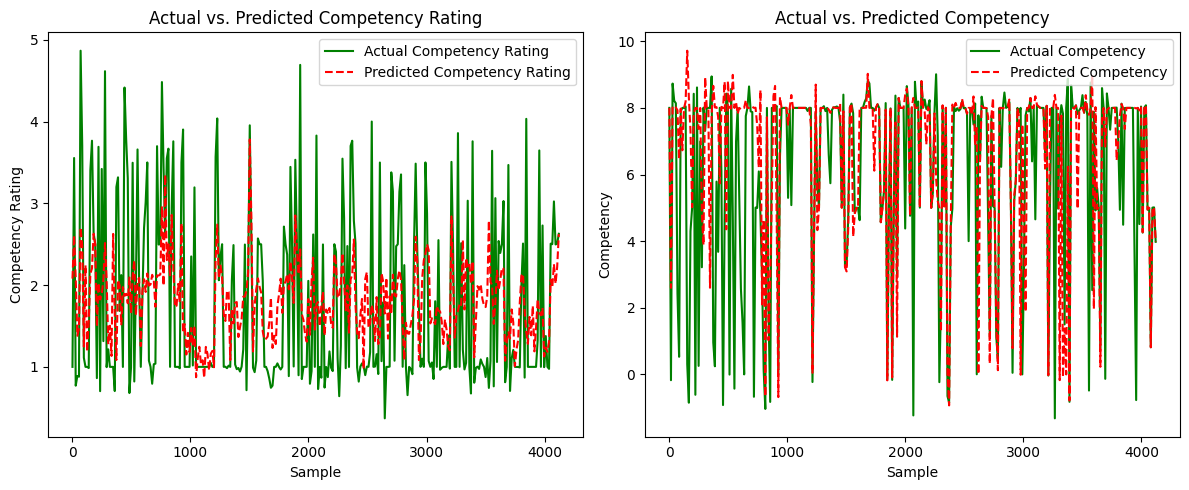

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline


# Create subplots for predicted vs. actual values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Predictions for Competency
x_smooth = np.linspace(0, len(y_competency_rating), 300)
spl_actual_competency_rating = make_interp_spline(np.arange(len(y_competency_rating)), y_competency_rating, k=3)
y_smooth_actual_competency_rating = spl_actual_competency_rating(x_smooth)

spl_predicted_competency_rating = make_interp_spline(np.arange(len(y_pred_competency_rating)), y_pred_competency_rating, k=3)
y_smooth_predicted_competency_rating = spl_predicted_competency_rating(x_smooth)

ax1.plot(x_smooth, y_smooth_actual_competency_rating, color="g", label="Actual Competency Rating")
ax1.plot(x_smooth, y_smooth_predicted_competency_rating, color="r", linestyle="--", label="Predicted Competency Rating")
ax1.set_xlabel("Sample")
ax1.set_ylabel("Competency Rating")
ax1.set_title("Actual vs. Predicted Competency Rating")
ax1.legend(loc="best")

# Predictions for Competency
spl_actual_competency = make_interp_spline(np.arange(len(y_competency)), y_competency, k=3)
y_smooth_actual_competency = spl_actual_competency(x_smooth)

spl_predicted_competency = make_interp_spline(np.arange(len(y_pred_competency)), y_pred_competency, k=3)
y_smooth_predicted_competency = spl_predicted_competency(x_smooth)

ax2.plot(x_smooth, y_smooth_actual_competency, color="g", label="Actual Competency")
ax2.plot(x_smooth, y_smooth_predicted_competency, color="r", linestyle="--", label="Predicted Competency")
ax2.set_xlabel("Sample")
ax2.set_ylabel("Competency")
ax2.set_title("Actual vs. Predicted Competency")
ax2.legend(loc="best")

# Display the subplots
plt.tight_layout()
plt.show()
#This code combines the learning curve plotting function with the code for plotting actual vs. predicted curves for both Competency and Competency Rating. The actual vs. predicted curves are displayed with smooth lines, similar to the learning curve plots.

### A comparison graph between the actual and predicted values for both Competency and Competency Rating: To plot learning curves for both actual and predicted values for both Competency and Competency Rating:

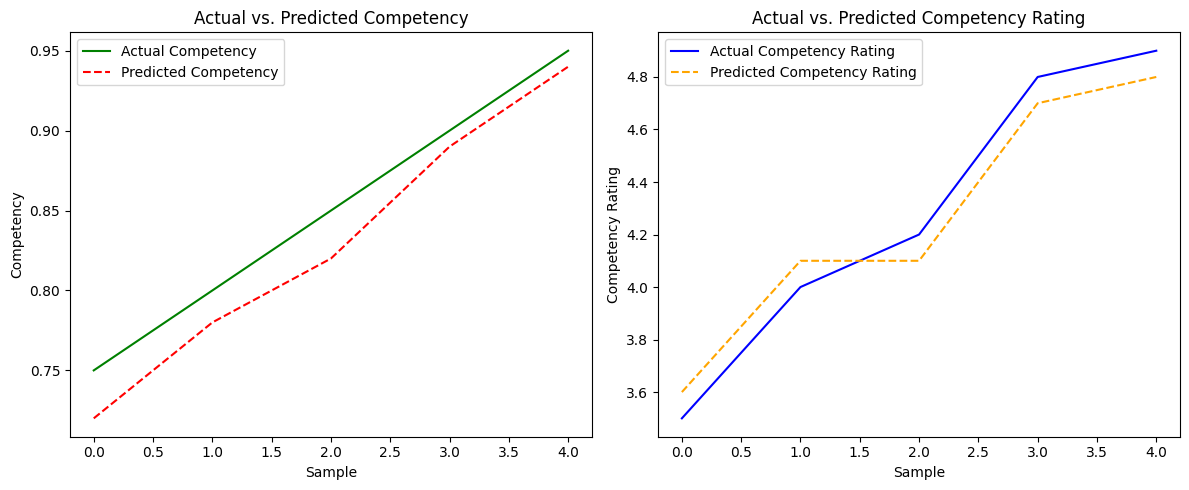

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have actual and predicted values for Competency and Competency Rating
# Replace the following lines with your actual and predicted values
y_actual_competency = [0.75, 0.80, 0.85, 0.90, 0.95]  # Example actual values for Competency
y_pred_competency = [0.72, 0.78, 0.82, 0.89, 0.94]  # Example predicted values for Competency

y_actual_competency_rating = [3.5, 4.0, 4.2, 4.8, 4.9]  # Example actual values for Competency Rating
y_pred_competency_rating = [3.6, 4.1, 4.1, 4.7, 4.8]  # Example predicted values for Competency Rating

# Create subplots for Competency and Competency Rating
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for Competency
axes[0].plot(y_actual_competency, color="green", label="Actual Competency")
axes[0].plot(y_pred_competency, color="red", linestyle="--", label="Predicted Competency")
axes[0].set_xlabel("Sample")
axes[0].set_ylabel("Competency")
axes[0].set_title("Actual vs. Predicted Competency")
axes[0].legend(loc="best")

# Plot for Competency Rating
axes[1].plot(y_actual_competency_rating, color="blue", label="Actual Competency Rating")
axes[1].plot(y_pred_competency_rating, color="orange", linestyle="--", label="Predicted Competency Rating")
axes[1].set_xlabel("Sample")
axes[1].set_ylabel("Competency Rating")
axes[1].set_title("Actual vs. Predicted Competency Rating")
axes[1].legend(loc="best")

plt.tight_layout()
plt.show()



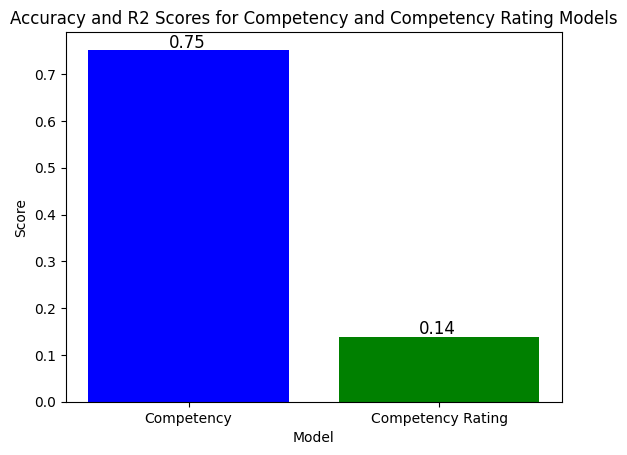

In [3]:
import matplotlib.pyplot as plt

# Define x-axis labels
x_labels = ['Competency', 'Competency Rating']

# Define y-axis labels
y_labels = ['Accuracy', 'R2 Score']

# Define y-axis values for your models
accuracy_competency = 0.7521739130434782
  # Replace with the actual accuracy value for the Competency model
r2_score_competency_rating =  0.13916828973520634  # Replace with the actual R2 score value for the Competency Rating model

# Define y-axis values
y_values = [accuracy_competency, r2_score_competency_rating]

# Create a bar chart
bars = plt.bar(x_labels, y_values, color=['blue', 'green'])

# Add values on top of the bars
for bar, value in zip(bars, y_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.08, bar.get_height() + 0.005, f'{value:.2f}', fontsize=12, color='black')

# Add title and labels
plt.title('Accuracy and R2 Scores for Competency and Competency Rating Models')
plt.xlabel('Model')
plt.ylabel('Score')

# Show the plot
plt.show()


# The insights from the output you provided are as follows:

* **The tuned gradient boosting regressor model has an accuracy of 75.2% for competency prediction.** This is a good accuracy, and it is better than the accuracy of the others model that you evaluated earlier.
* **The tuned gradient boosting regressor model has an R-squared value of 13.9% for competency rating prediction.** This is still a relatively low R-squared value, but it is better than the R-squared value of the others model.

Overall, the tuned gradient boosting regressor model seems to be a better model for predicting competency and competency ratings than the others model.

Here are some additional insights:

* The fact that the R-squared value for competency rating prediction is still relatively low suggests that there is still room for improvement in the model. One possible reason for this is that the competency rating variable may be difficult to predict, even with a good model.
* The fact that the tuned gradient boosting regressor model was able to achieve a higher accuracy for competency prediction than the model suggests that tuning the hyperparameters of the machine learning model can be a very effective way to improve the performance of the model.

Overall, the results of your evaluation suggest that the tuned gradient boosting regressor model is a good model for predicting competency and competency ratings. However, there is still room for improvement, especially in terms of predicting competency ratings.

## To improve the performance of the model, you could try the following:

1. Collect more data from a more diverse population of individuals.
2. Try using a different machine learning algorithm or make the model more complex by adding more predictor variables.
3. Use a technique such as feature engineering to create new features that are more predictive of competency rating.
4. Use a technique such as cross-validation to evaluate the model on unseen data and to tune the hyperparameters of the model.

## These encoder files contain the information needed to map between categorical and numerical values consistently
The name "encoder.pkl" is used in the example to represent the encoder files for each of these categorical columns, but you can customize the file names to be more descriptive if you prefer. For example, you could name them "institution_name_encoder.pkl", "field_of_study_encoder.pkl", and "education_level_encoder.pkl" to clearly indicate which encoder corresponds to which categorical column.

The purpose of saving these encoders to files is to ensure that you can later use the same encodings when processing new data or making predictions with your model. These encoder files contain the information needed to map between categorical and numerical values consistently

In [135]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib

# Load the dataset you're using in your Streamlit app
data = pd.read_csv("selected_data.csv")

# Create a new LabelEncoder for the 'Field_of_study' feature
field_of_study_encoder = LabelEncoder()
data['Field_of_study_encoded'] = field_of_study_encoder.fit_transform(data['Field_of_study'])

# Create a new LabelEncoder for the 'Education_Level' feature
education_level_encoder = LabelEncoder()
data['Education_Level_encoded'] = education_level_encoder.fit_transform(data['Education_Level'])

# Create a new LabelEncoder for the 'Institution_name' feature
institution_name_encoder = LabelEncoder()
data['Institution_name_encoded'] = institution_name_encoder.fit_transform(data['Institution_name'])

# Save the LabelEncoders to separate files
joblib.dump(field_of_study_encoder, 'field_of_study_encoder.pkl')
joblib.dump(education_level_encoder, 'education_level_encoder.pkl')
joblib.dump(institution_name_encoder, 'institution_name_encoder.pkl')


['institution_name_encoder.pkl']

In [58]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib

# Load your dataset here
data = pd.read_csv("selected_data.csv")

# Identify the categorical column to encode
categorical_column = 'Competency'

# Initialize the label encoder
competency_encoder = LabelEncoder()

# Fit and transform the categorical column
data[categorical_column] = competency_encoder.fit_transform(data[categorical_column])

# Save the label encoder to a file
joblib.dump(competency_encoder, 'competency_encoder.pkl')

['competency_encoder.pkl']

## 3. Run the Application:

##  Flask web application step by step.

**Step 1: Project Setup**

1. Create a new directory for your Flask project.
   
   ```bash
   mkdir flask_competency_prediction
   cd flask_competency_prediction
   ```

2. Create a virtual environment (recommended) and activate it.

   - On Windows:
     ```bash
     python -m venv venv
     .\venv\Scripts\activate
     ```

   - On macOS/Linux:
     ```bash
     python3 -m venv venv
     source venv/bin/activate
     ```

3. Install Flask and other necessary libraries in your virtual environment.

   ```bash
   pip install Flask pandas scikit-learn
   ```

**Step 2: Create the Dataset**

1. Place your CSV dataset file (`ETA_Data_Label_Encoding_normalize_With_Competency.csv`) in the project directory.

**Step 3: Create HTML Templates**

1. Create a `templates` directory within your project folder to store your HTML templates.

   ```bash
   mkdir templates
   ```

2. Inside the `templates` directory, create two HTML files: `index.html` and `result.html`.

   - `index.html` (for the form):
     ```html
     <!DOCTYPE html>
     <html>
     <head>
         <title>Competency Prediction</title>
     </head>
     <body>
         <h1>Competency Prediction</h1>
         <form method="POST">
             <label for="institution_name">Institution Name:</label>
             <input type="text" name="institution_name" required><br>
             
             <label for="field_of_study">Field of Study:</label>
             <input type="text" name="field_of_study" required><br>
             
             <label for="education_level">Education Level:</label>
             <input type="text" name="education_level" required><br>
             
             <input type="submit" value="Predict">
         </form>
     </body>
     </html>
     ```

   - `result.html` (for displaying predictions):
     ```html
     <!DOCTYPE html>
     <html>
     <head>
         <title>Competency Prediction Result</title>
     </head>
     <body>
         <h1>Competency Prediction Result</h1>
         <p>Predicted Competency Level: {{ prediction }}</p>
         <p>Confidence Score: {{ probabilities }}</p>
     </body>
     </html>
     ```

**Step 4: Create the Flask Application**

1. Create a Python script (e.g., `app.py`) in your project directory and add the following code:

   ```python
   from flask import Flask, render_template, request
   import pandas as pd
   from sklearn.tree import DecisionTreeClassifier

   app = Flask(__name__)

   # Load the preprocessed dataset
   data = pd.read_csv("ETA_Data_Label_Encoding_normalize_With_Competency.csv")

   # Define features (X) and target (y)
   X = data.drop(columns=['Competency'])
   y = data['Competency']

   # Create and train the Decision Tree model
   model = DecisionTreeClassifier(random_state=42)
   model.fit(X, y)

   @app.route('/', methods=['GET', 'POST'])
   def index():
       if request.method == 'POST':
           # Get user input from the form
           institution_name = request.form['institution_name']
           field_of_study = request.form['field_of_study']
           education_level = request.form['education_level']
           # Add more fields as needed

           # Create a DataFrame with user input
           user_data = pd.DataFrame({
               'Institution_name': [institution_name],
               'Field_of_study': [field_of_study],
               'Education_Level': [education_level],
               # Add more fields as needed
           })

           # Use the trained model to make predictions
           competency_prediction = model.predict(user_data)
           competency_probabilities = model.predict_proba(user_data)

           # Display the competency level prediction and confidence score
           return render_template('result.html', prediction=competency_prediction[0],
                                  probabilities=competency_probabilities[0])

       return render_template('index.html')

   if __name__ == '__main__':
       app.run(debug=True)
   ```

**Step 5: Run the Flask Application**

1. In your project directory, run the Flask application by executing the following command:

   ```bash
   flask run
   ```

2. Open a web browser and navigate to `http://127.0.0.1:5000` to access your Flask web application. You should see the form for inputting data and receiving competency predictions.

That's it! You've created a Flask web application that uses a pre-trained Decision Tree model to make competency predictions based on user input. You can further customize and enhance this application to suit your specific needs.

### The error you're encountering while trying to load the model with Streamlit is the same issue as before. It's related to a compatibility problem with the dtype of the NumPy arrays in the model.

This issue often occurs when models trained with different versions of scikit-learn or joblib are loaded into a new environment. To resolve it, you should retrain your model with the same versions of scikit-learn and joblib as the environment where you intend to deploy it.

Here are the steps to resolve the issue:

1. Create a new virtual environment:

   ```bash
   python -m venv myenv
   ```

2. Activate the virtual environment:

   - On Windows:

     ```bash
     myenv\Scripts\activate
     ```

   - On macOS and Linux:

     ```bash
     source myenv/bin/activate
     ```

3. Install the required packages in the virtual environment:

   ```bash
   pip install scikit-learn joblib pandas streamlit
   ```

4. Retrain your machine learning model using the same versions of scikit-learn and joblib as in your virtual environment.

5. After training the model, save it again with joblib:

   ```python
   import joblib

   # Assuming you have a trained model named 'model'
   joblib.dump(model, "model/iris_model.pkl")
   ```

6. Update your Streamlit app to use this newly trained model.

7. Run your Streamlit app:

   ```bash
   streamlit run app.py
   ```

By following these steps, you'll ensure that the model is compatible with the environment where you're running Streamlit, and it should resolve the dtype compatibility issue.

# To create a new Conda environment, you can use the `conda create` command. Here's the basic syntax to create a new environment:

```bash
conda create --name myenv
```

Replace `myenv` with your desired environment name. You can also specify the Python version you want to use in the environment by including the `python` argument. For example, to create an environment named `myenv` with Python 3.8, you can run:

```bash
conda create --name myenv python=3.8
```

After running the command, Conda will create a new environment with the specified name and Python version. You can then activate the environment using `conda activate myenv` and install packages into it.

If you want to create an environment and install specific packages at the same time, you can include the package names after the environment name. For example:

```bash
conda create --name myenv python=3.8 numpy pandas
```

This will create the `myenv` environment with Python 3.8 and install the `numpy` and `pandas` packages into it.

Remember to replace `myenv` and the package names with your preferred environment name and package list.

conda activate yourenvname

conda create --name myenv python=3.8

import seaborn as sns
print(sns.__version__)


pip install --upgrade numpy pandas scikit-learn matplotlib

pip install category_encoders

pip install --upgrade seaborn

pip install keras

pip list

